In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pyroomacoustics as pra
import noisereduce as nr
from pyroomacoustics.directivities import (
    DirectivityPattern,
    DirectionVector,
    CardioidFamily,
)
from pyroomacoustics.doa import circ_dist
from scipy.io import wavfile
from scipy.signal import correlate
from scipy.fft import fft, fftfreq, fftshift
from playsound import playsound
from os import listdir
from os.path import isfile, join

/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
playsound is relying on a python 2 subprocess. Please use `pip3 install PyObjC` if you want playsound to run more efficiently.


/var/folders/4t/rx6h__y129d95fxhwcb9st6w0000gn/T/ipykernel_10990/1257893223.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, noise = wavfile.read(file)
/var/folders/4t/rx6h__y129d95fxhwcb9st6w0000gn/T/ipykernel_10990/1257893223.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, signal = wavfile.read(file)
/var/folders/4t/rx6h__y129d95fxhwcb9st6w0000gn/T/ipykernel_10990/1257893223.py:19: RuntimeWarning: invalid value encountered in divide
  np.divide(channel,np.sqrt(np.var(channel)))


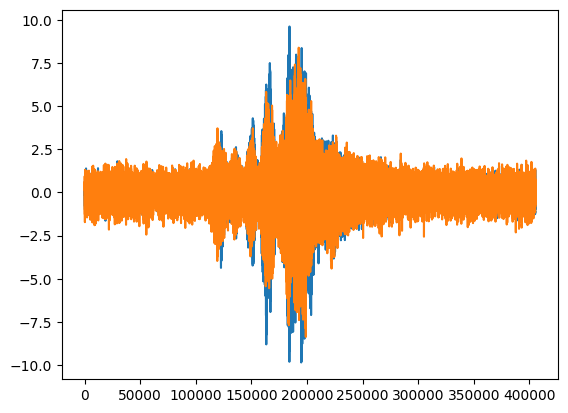

In [147]:
# read in signals from gridpoint
audio_file_path = "/Users/nharrison/DOA_Testing/y=2,x=-1/"
file = "/Users/nharrison/DOA_Testing/Room/1.wav"
fs, noise = wavfile.read(file)
for signalindex in range(1,8+1):
    file = audio_file_path + str(signalindex) + ".wav"
    fs, signal = wavfile.read(file)
    denoised = nr.reduce_noise(y=signal,sr=fs,y_noise=noise)
    if signalindex == 1:
        signals = np.zeros((8, len(signal)))
        denoised_signals = np.zeros((8, len(signal)))

    signals[signalindex-1, :] = signal
    denoised_signals[signalindex-1,:] = denoised
    wavfile.write("/Users/nharrison/denoised"+str(signalindex)+".wav", fs, denoised)

    normsignals = np.array(
        [
            np.divide(channel,np.sqrt(np.var(channel)))
            for channel in signals
        ]
    )

plt.plot(normsignals[1,:])
plt.plot(normsignals[2,:])

3

59.98621582018029

67.5974755707302
63.791845695455244

59.98621582018029

64.61174187118476
62.29897884568253

56.78055158898418

61.550180976029466
59.165366282506824


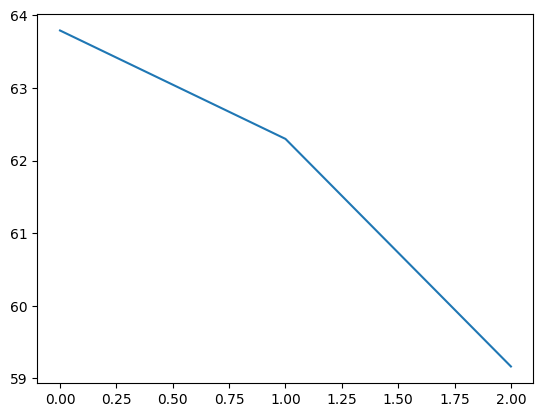

In [156]:
# find start of signal of interest
#plt.plot(signals[1,:])
# signal at 150000
nfft=1024
starts = [150000,151000,152000]


#plt.plot(package[1,:])
#plt.plot(package[2,:])

Tau = np.zeros([4,4])
print(len(starts))
azrange = [-np.pi/2,np.pi/2]
c = 343
sinc = 0.3

detected = []
for start in starts:
    azs = []
    package = normsignals[2:6,start:start+nfft]
    
    for i in range(3):
        for j in range(i,3):
            if i==j:
                continue
            if abs(i-j) > 1:
                continue
            s = np.abs(i-j)*sinc
            #print(sinc)
            corr = correlate(package[i,:],package[j,:])
            tau_max = s/c
            tau_index_max = tau_max*fs-1
            tau_index_max = int(tau_index_max)
            #print(tau_index_max)
            taus = (np.arange(len(corr))-nfft+1)/fs
            corrslice = corr[nfft-1-tau_index_max:nfft-1+tau_index_max]

            index = np.argmax(corr[nfft-1-tau_index_max:nfft-1+tau_index_max])
            
            tau = taus[nfft-1-tau_index_max+index]
            print()
            az = np.arccos(taus[nfft-1-tau_index_max:nfft-1+tau_index_max]*c/s)
            #plt.plot(180/np.pi*az-90,corr[nfft-1-tau_index_max:nfft-1+tau_index_max])
            #plt.plot(np.arccos(taus[1023-tau_index_max:1023+tau_index_max]*c/s))
            d = tau*c
            #print(d)
            #print(i)
            #print(j)
            #print(d/s)
            print(np.arccos(d/s)*180/np.pi)
            azs.append(np.arccos(d/s)*180/np.pi)
            if np.abs(np.arccos(d/s)*180/np.pi-65) > 20:
                pass
                #plt.plot(180/np.pi*az-90,corr[nfft-1-tau_index_max:nfft-1+tau_index_max])
    detected.append(np.mean(azs))
    print(np.mean(azs))


plt.plot(detected)

